# Linear Regression

In [1]:
#Ref: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
#Ref: https://www.geeksforgeeks.org/linear-regression-python-implementation/
#Ref: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
#Ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn import datasets, linear_model, metrics 
from sklearn.metrics import mean_squared_error, r2_score

# Problem: We will solve a regression problem, ie, given X we will predict the Y (continuous)

In [2]:
#Problem: We will solve a regression problem, ie, given X we will predict the Y (continuous)

# load the boston dataset 
boston_data = datasets.load_boston(return_X_y=False)
#the return_X_y=False returns a bunch object and next we convert the bunch object to a pandas dataframe
df1 = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
df1['target'] = pd.Series(boston_data.target)
df1.head()
#df1.to_csv('boston.csv')
#Data description
#This data has 14 columns and the goal is to predict the median value (price) of a home which is shown as the target column 
#The features are as follows:
#CRIM - per capita crime rate by town
#ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
#INDUS - proportion of non-retail business acres per town.
#CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
#NOX - nitric oxides concentration (parts per 10 million)
#RM - average number of rooms per dwelling
#AGE - proportion of owner-occupied units built prior to 1940
#DIS - weighted distances to five Boston employment centres
#RAD - index of accessibility to radial highways
#TAX - full-value property-tax rate per $10,000
#PTRATIO - pupil-teacher ratio by town
#B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#LSTAT - % lower status of the population
#MEDV - Median value of owner-occupied homes in $1000's

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Variables identification

In [3]:
#Variables identification

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [4]:
df1.shape

(506, 14)

# check individual column count

In [5]:
df1['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [6]:
#check individual column count
#df.count() does not include NaN values
data=df1.copy()
ls=list()
ls1=list()
for i in data.columns:
    if data[i].dtypes in ['float64', 'int64']:
        if data[i].nunique() > 10:
            ls.append(i)
            ls1.append(data[i].nunique())

print(ls, "\n",ls1)

print(df1['CRIM'].count())
df1[ls].describe()

['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'target'] 
 [504, 26, 76, 81, 446, 356, 412, 66, 46, 357, 455, 229]
506


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


# Check for missing values

In [7]:
#Check for missing values
# Total missing values for each feature
#Pandas isnull() method detect blank and NA as NaN
print (df1.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64


# Replace missing values with a number (only in case required)

In [8]:
# Replace missing values with a number (only in case required)
# Replace  missing values using median (only in case required)
#median = df1['CRIM'].median()
#print("Median of feature 'CRIM' = ", median)
#df1['CRIM'].fillna(median, inplace=True)

# Lets check the distribution of the data

In [9]:
#Lets check the distribution of the data

#Standard deviation shows how much the variable is spread above or below the mean.
#25th percentile is the value below which 25% of the observations are found
#25th percentile is 1st quartile, 50th percentile is second quartile or median, and 75th percentile is 3rd quartile
print(df1.describe())
print(df1.shape)

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

# lets plot the Scatter diagram of some of the features

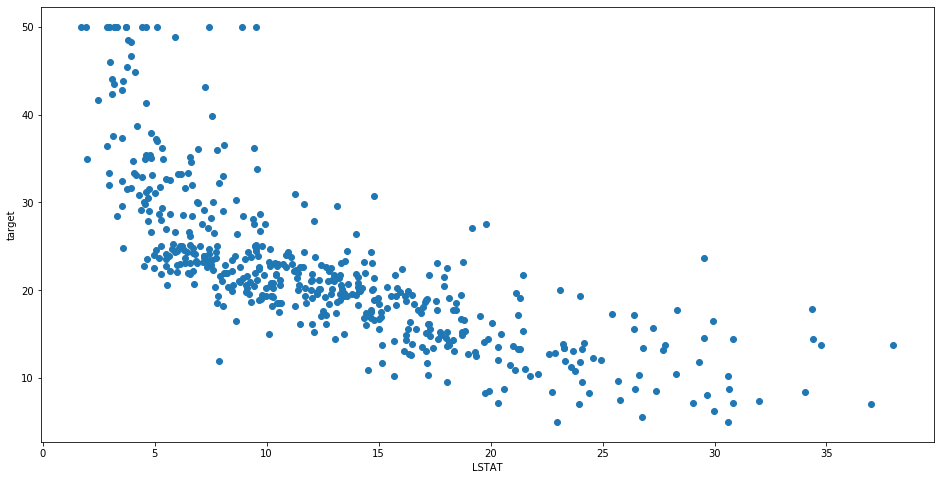

In [10]:
#lets plot the Scatter diagram of some of the features
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df1['LSTAT'], df1['target'])
ax.set_xlabel('LSTAT')
ax.set_ylabel('target')
plt.show()

# Boxplot

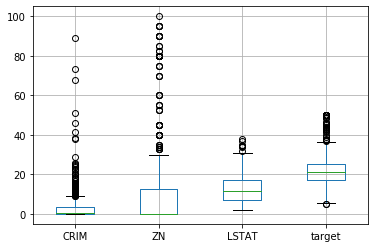

In [11]:
#Boxplot
boxplot = df1.boxplot(column=['CRIM', 'ZN', 'LSTAT' , 'target'])

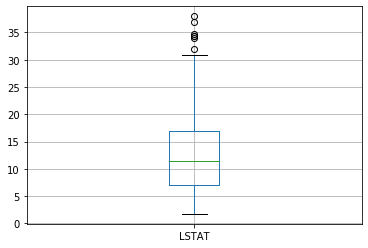

In [12]:
#Boxplot
boxplot = df1.boxplot(column=['LSTAT'])

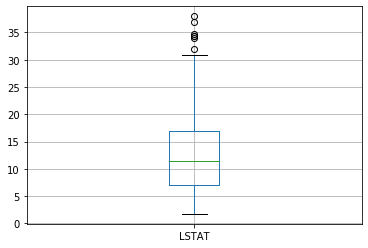

In [13]:
#creating a backup dataframe df2
df2 = df1
boxplot = df2.boxplot(column=['LSTAT'])

# outlier detection
### Z score is data mean centered divided by standard deviation 

In [20]:
#outlier detection
##Z score is data mean centered divided by standard deviation
##Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data
## points. Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.
#calculate Z score
df_temp = df1

from scipy import stats
z = np.abs(stats.zscore(df_temp))
#print data points whose z score is greater than 3
threshold = 3
print(np.where(z > 3))

# print(z[[12]])
print("z score of 5th row 1st column = ", z[5][1]) #print z score of 5th row 1st column



(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

# Outlier removal using Zscore

In [15]:
#Outlier removal using Zscore
#Z score is data mean centered divided by standard deviation 
## remove points +-3 taking that as outlier
df_temp_OutRemoved = df_temp[(z < 3).all(axis=1)]
print("Original data shape is: ", df1.shape)
print("Data shape after removing outliers: ", df_temp_OutRemoved.shape)

Original data shape is:  (506, 14)
Data shape after removing outliers:  (415, 14)


In [16]:
df_temp.head

<bound method NDFrame.head of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  target  
0       15.3  396.90   4.98    

In [17]:
#Head of the outlier removed data
df_temp_OutRemoved.head

<bound method NDFrame.head of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  target  
0       15.3  396.90   4.98    

In [18]:
## Removing outlier using IQR
Q1 = df_temp[ls].quantile(0.25)
Q3 = df_temp[ls].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
target       7.975000
dtype: float64


In [19]:
print(df_temp[ls] < (Q1 - 1.5 * IQR)) |(df_temp[ls] > (Q3 + 1.5 * IQR))

      CRIM     ZN  INDUS    NOX     RM    AGE    DIS    TAX  PTRATIO      B  \
0    False  False  False  False  False  False  False  False    False  False   
1    False  False  False  False  False  False  False  False    False  False   
2    False  False  False  False  False  False  False  False    False  False   
3    False  False  False  False  False  False  False  False    False  False   
4    False  False  False  False  False  False  False  False    False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...      ...    ...   
501  False  False  False  False  False  False  False  False    False  False   
502  False  False  False  False  False  False  False  False    False  False   
503  False  False  False  False  False  False  False  False    False  False   
504  False  False  False  False  False  False  False  False    False  False   
505  False  False  False  False  False  False  False  False    False  False   

     LSTAT  target  
0    False   False  
1    Fals

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [ ]:
belowQ1Outlier=df_temp[ls].quantile(0.05)
aboveQ3Outlier=df_temp[ls].quantile(0.99)
print(belowQ1Outlier[:-1,],"\n")
print(aboveQ3Outlier[:-1,])

In [ ]:
boston_df_out = df_temp[~((df_temp[ls] < (Q1 - 1.5 * IQR)) |(df_temp[ls] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(boston_df_out.shape)
print(df_temp.shape)

# Now lets take a look at how the target is distributed

In [ ]:
#Now lets take a look at how the target is distributed
print(df1['target'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df1['target'], color='g', bins=100, hist_kws={'alpha': 0.5});

In [ ]:
df_temp_OutRemoved.shape

In [ ]:
plt.figure(figsize=(9, 8))
sns.distplot(boston_df_out['target'], color='g', bins=100, hist_kws={'alpha': 0.5});

# plot the histogram of the features for EDA

In [ ]:
# plot the histogram of the features
boston_df_out.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)


# Now lets find the correlation of the features with the target with a threshold 0.5. This can change on a case by case basis

In [ ]:
#Now lets find the correlation of the features with the target with a threshold 0.5. This can change on a case by case basis
df1_corr = boston_df_out.corr()['target'][:-1]
corr = df1_corr[abs(df1_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with target:\n{}".format(len(corr), corr))


# lets see if we make absolute correlation > .3 what happens

In [ ]:
#We see that absolute correlation threshold > 0.5 leaves out many features such as age, CHAS, etc.
#lets see if we make absolute correlation > 3 what happens
df1_corr = boston_df_out.corr()['target'][:-1]
corr = df1_corr[abs(df1_corr) > 0.3].sort_values(ascending=False)
print("There is {} strongly correlated values with target:\n{}".format(len(corr), corr))

#we see that keeping absolute correlation threshold > 0.3 retains many of the feaures
#we will use all the features for further analysis. However it depends on a case by case basis whether you want to drop any feature


# Now lets check correlation of features

In [ ]:
#now lets check correlation of features
corr_features = boston_df_out.drop('target', axis=1).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_features[(corr_features >= 0.7) | (corr_features <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

#We see that the features RAD and TAX are highly correlated. Now depending on the particular use case we can decide to either drop 
#one of these variables.
#We see that the features RAD and TAX are highly correlated with CRIM. Now depending on the particular use case we can decide to either drop 
#one of these variables.


# define feature matrix(X) and response vector(y) 

In [27]:
# define feature matrix(X) and response vector(y) 
# X = df1.loc[:, df1.columns != 'target'] 
# y = df1.loc[:, df1.columns == 'target'] 

X = boston_df_out.loc[:, boston_df_out.columns != 'target'] 
y = boston_df_out.loc[:, boston_df_out.columns == 'target'] 


NameError: name 'boston_df_out' is not defined

# split X and y into training and testing sets

In [28]:
# split X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

NameError: name 'X' is not defined

In [22]:
import statsmodels.api as sm
model = sm.OLS(y,X)
results = model.fit()
results.params

NameError: name 'y' is not defined

In [ ]:
results.summary()

In [ ]:
boston_df_out.columns[[0,1,2,3,4,5,6,7,9,10,11,12]]

In [ ]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

##Step 1: Run a multiple regression
#gather features
features = "+".join(boston_df_out.columns[[0,1,2,3,4,5,6,7,9,10,11,12]])
# get y and X dataframes based on this regression:
ym, Xm = dmatrices('target ~' + features, boston_df_out, return_type='dataframe')

##Step 2: Calculate VIF Factors
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(Xm.values, i) for i in range(Xm.shape[1])]
vif["features"] = Xm.columns

###Step 3: Inspect VIF Factors
vif.round(1)    

# create linear regression object 
## fit_intercept is used whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (e.g. data is expected to be already centered).
## normalize If True, the regressors X will be normalized before regression 

In [23]:
# create linear regression object 
#fit_intercept is used whether to calculate the intercept for this model. If set to False, no intercept will be used in 
#calculations (e.g. data is expected to be already centered).
# normalize If True, the regressors X will be normalized before regression 
reg_model = linear_model.LinearRegression(fit_intercept=True, normalize=True)

In [24]:
reg_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

# train the model using the training set 

In [25]:
# train the model using the training set 
reg_model.fit(X_train, y_train) 

NameError: name 'X_train' is not defined

# print the regression coefficients 

In [ ]:
# print the regression coefficients 
feature_columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
print('Coefficients: \n', reg_model.coef_) 

In [ ]:
# print the regression intercept 
print('Intercept: \n', reg_model.intercept_)

# variance score 

In [ ]:
# variance score where 1 means perfect prediction 
print('Variance score: {}'.format(reg_model.score(X_test, y_test)))

In [ ]:
print('Variance score: {}'.format(reg_model.score(X_train, y_train)))

# Make predictions using the testing set

In [ ]:
# Make predictions using the testing set
y_pred = reg_model.predict(X_test)

# print MSE

In [ ]:
#print mean squared error. Ideal MSE is 0
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Print r squared error

In [ ]:
# Print r squared error. Explained variance score (1 is perfect prediction)
print('r-squared error: %.2f' % r2_score(y_test, y_pred))

# plotting the residual error 

In [ ]:
# plotting the residual error 
  
## setting plot style 
plt.style.use('fivethirtyeight') 
  
## plotting residual errors in training data 
plt.scatter(reg_model.predict(X_train), reg_model.predict(X_train) - y_train, color = "green", s = 10, label = 'Train data') 

## plotting residual errors in test data 
plt.scatter(reg_model.predict(X_test), reg_model.predict(X_test) - y_test, 
            color = "blue", s = 10, label = 'Test data') 
  
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show() 

# Lets change some modeling parameters and see how the accuracy changes

In [ ]:
#Lets change some modeling parameters and see how the accuracy changes

# create linear regression object 
#fit_intercept is used whether to calculate the intercept for this model. If set to False, no intercept will be used in 
#calculations (e.g. data is expected to be already centered).
# normalize If True, the regressors X will be normalized before regression 
reg_model_2 = linear_model.LinearRegression(fit_intercept=False, normalize=False)

# train the model using the training set 
reg_model_2.fit(X_train, y_train) 

# Make predictions using the testing set
y_pred_2 = reg_model_2.predict(X_test)

#print mean squared error. Ideal MSE is 0
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred_2))

# Print r squared error. Explained variance score (1 is perfect prediction)
print('r-squared error: %.2f' % r2_score(y_test, y_pred_2))

In [ ]:
##Train R-Square 
reg_model_2.score(X_train, y_train) 